# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

The three outliers in the upper left corner of the graph is generated from low first PCA and high second PCA. This just means that the variables of the outliers had a large impact on one PCA while did not have much impact on the other. 

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

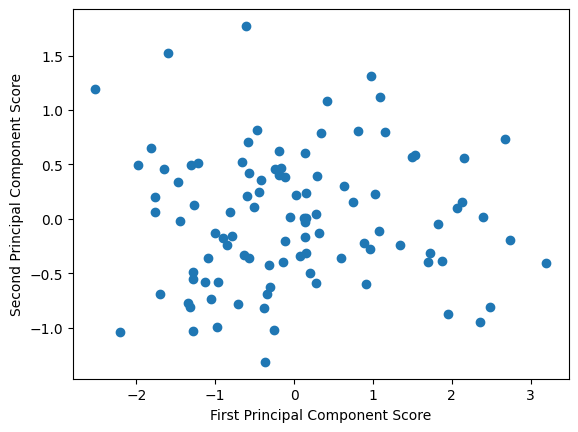

In [9]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

1) Because the dataset contains many features (29), it was expected that any one projections of a principal component will capture enough variance to fully represent the dataset. As expected, first PCA only captured 20% of the variance in the dataset which is far less than enough.
Although it is capture the most variance, further analysis is needed until we can determine which features to keep. For datasets like mine with many features, it will be useful to perform feature selection methods.

2) There were very obvious useful features and obvious less-useful features. As we saw on the previous week's analysis, the dollar amount paid features like total_claim_amount and injury_claim proved to be the most important feature to the overall dataset. Less correlated but still important features wre, incident_type, collision_type, number_of_vehicles_involved, and authorities_contacted. 
<br />Also as expected, columns policy_number and insured_zip had the lowest correlations at r= 0.12 and 0.129 respectively.

3) My dataset continues to show promising data analysis results. While just one direction of the first PCA only captures 20% of the data's variance, using the first 5 PCA captures 64% of the dataset's variance. Which may prove to be a useful extraction to make. We've also found  weakly correlated features like policy_number, insured_zip, and policy_year which should be removed from the final model. <br /> There were no obvious oultiers beyond what we have identified previously with univariate analysis but there were unexpected results. For example, I would have imagined umbrella limit to have more of an impact on the dataset as other financial features did but it had low impact.


Principal Component Vectors:
[[ 3.55990868e-02  3.89604338e-02 -6.11056113e-03  1.28031679e-02
   1.37651732e-03 -2.01645526e-02 -1.57256583e-02  1.07949463e-02
  -1.56495670e-02  2.89007746e-01  1.21044932e-01  1.70679679e-01
   1.67373766e-02 -1.58510931e-03  3.88216459e-01  3.15067554e-01
   3.17309454e-01  3.80210356e-01 -9.93459051e-03  8.20084250e-02
   1.75149222e-01 -2.56182452e-01  1.24798195e-01 -2.62378346e-01
  -3.85951655e-01  1.11347305e-01  1.08600350e-01  1.11368424e-01
   8.84972973e-03]
 [ 2.58994197e-02  2.50985679e-02 -2.72520350e-02 -4.75437343e-02
   5.43487644e-02 -1.88947675e-03 -3.60988865e-02 -4.71249987e-02
   7.83475851e-03  1.70884967e-02 -3.01319877e-02 -5.52424467e-01
  -1.24808835e-02  7.55324923e-03  7.91222663e-02  5.56772267e-02
   6.17503256e-02  8.04427894e-02 -6.56429166e-02  2.61817429e-02
  -5.56196006e-01 -1.34888622e-02  5.74563364e-01 -1.25333239e-02
  -1.93437472e-02  1.08318496e-01 -2.09639436e-02 -6.76028702e-02
  -3.15639869e-02]
 [ 6.721

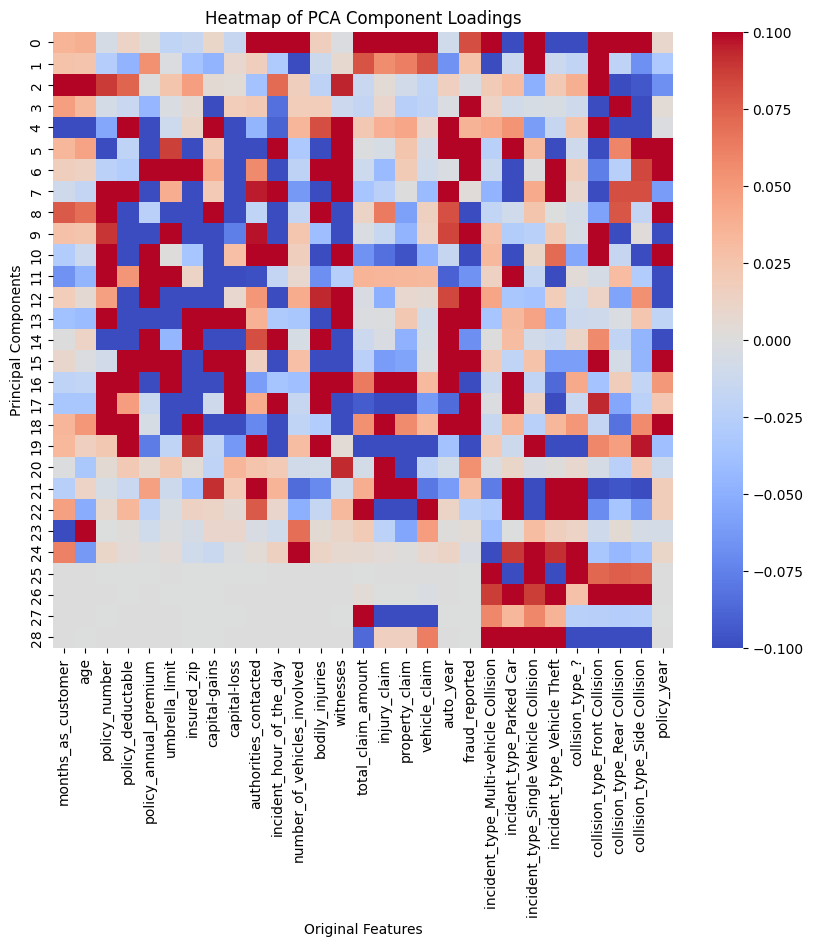


Explained Variance Ratio:
[2.06067896e-01 8.84622043e-02 6.82084327e-02 4.89482211e-02
 4.73026144e-02 4.19149832e-02 3.89647496e-02 3.82059215e-02
 3.75872336e-02 3.61940182e-02 3.49082845e-02 3.39923958e-02
 3.33632059e-02 3.31805385e-02 3.19716111e-02 3.17488280e-02
 3.10089481e-02 2.97931879e-02 2.75791055e-02 2.28344436e-02
 1.46867719e-02 1.27784913e-02 6.40037095e-03 2.62963292e-03
 1.26790888e-03 3.99193780e-17 2.50693926e-17 0.00000000e+00
 0.00000000e+00]


In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset (replace 'file_downloaded.csv' with actual path)
df = pd.read_csv("processed_insurance_claims.csv")

# Handle missing values (drop or fill NaN)
df_numerical = df.select_dtypes(include=[np.number]).dropna()  # Drop rows with NaN

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numerical)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Principal Component Analysis Results
print("\nPrincipal Component Vectors:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


# Linear Regression Predictions for Original Features
for target in df_numerical.columns:
    predictors = [col for col in df_numerical.columns if col != target]
    X = df_numerical[predictors]
    y = df_numerical[target]
    
    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)
    
    mse = mean_squared_error(y, preds)
    correlation = np.corrcoef(preds, y)[0, 1]
    
    print(f"\nPredicting {target} from {predictors}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Correlation Coefficient: {correlation}")


principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

pc_df = pd.DataFrame(
    principal_components, # Naming the principal components
    columns=df_numerical.columns  # Using original feature names as columns
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pc_df, cmap='coolwarm', fmt='.1f', vmin='-0.1', vmax='0.1')
plt.title("Heatmap of PCA Component Loadings")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

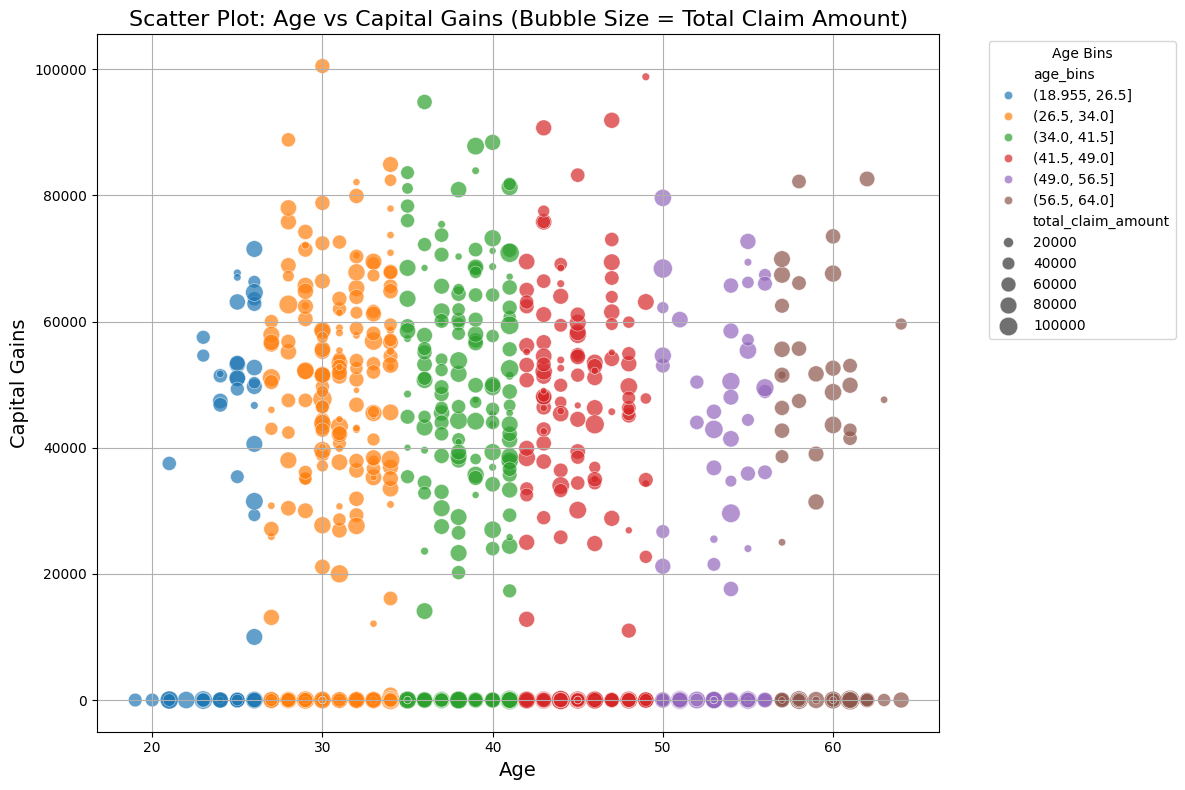

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'insurance_claims.csv' with your actual file path)
df = pd.read_csv("insurance_claims_mendeley.csv")

# Check if the required columns exist
required_columns = ['age', 'capital-gains', 'total_claim_amount']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The dataset does not contain all required columns: {required_columns}")

# Bin the 'age' column into 6 bins
df['age_bins'] = pd.cut(df['age'], bins=6)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='age',  # X-axis: age
    y='capital-gains',  # Y-axis: capital-gains
    size='total_claim_amount',  # Bubble size: total claim amount
    sizes=(20, 200),  # Minimum and maximum bubble sizes
    hue='age_bins',  # Color by age bins
    alpha=0.7,
)

# Customize plot appearance "Utilizing Colors to Focus Attention"
plt.title("Scatter Plot: Age vs Capital Gains (Bubble Size = Total Claim Amount)", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Capital Gains", fontsize=14)
plt.legend(title="Age Bins", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
